In [175]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
#mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
from scipy.misc import imsave
from scipy.misc import imread
import copy
import math
import pims
import trackpy as tp
from pims import Frame

In [176]:
import trackpy
import trackpy.diag

trackpy.__version__
#trackpy.diag.dependencies()

u'0.3.1'

In [191]:
shot=232
pic = 18333
v= pims.TiffStack('/Users/pinghanchu/Documents/Git/Data/Shot{}/Shot{}_Cam_{}.tif'.format(shot,shot,pic))
size = len(v)
v0 = tp.bandpass(v[0],0,300,threshold=5,truncate=4)
#imsave("/Users/pinghanchu/Documents/Git/Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif".format(shot,shot,pic),v0)
zero = tp.bandpass(v[300],0,300,threshold=5,truncate=10)-v0
zero[zero>0]=0
zero[zero<0]=0
a = zero
b = zero
comb_index = 1
run_range = int(size/comb_index)
for iv1 in range(500,run_range):
#for iv1 in range(500, 1000):
    for iv2 in range(0,comb_index):
        iv = iv1*comb_index +iv2
        vi = tp.bandpass(v[iv],0,300,threshold=5,truncate=5)-v0
        vi[vi < 0] = 0
        #print(vi.max())
        vi = tp.bandpass(vi,0,300,threshold=5,truncate=10)
        vi = tp.bandpass(vi,0,300,threshold=10,truncate=10)        
        a = a+vi
        #print(a.max())
#a = tp.bandpass(a,0,300,threshold=5,truncate=5)
#imsave("/Users/pinghanchu/Documents/Git/Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum_nobeginning.tif".format(shot,shot,pic),a)

In [192]:
imgL = copy.copy(a)
imgL1 = copy.copy(imgL)
print(imgL1.max())

1011413.08545


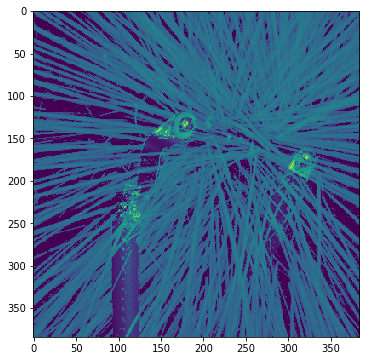

In [193]:
bkL = imread("/Users/pinghanchu/Documents/Git/Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif".format(shot,shot,pic))
#imgL = imread("/Users/pinghanchu/Documents/Git/Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum_nobeginning.tif".format(shot,shot,pic))
width, height = imgL1.shape
#imgL1 = a
#print(imgL1.max())
#for x in range(width):
#    for y in range(height):
#        if(imgL[x][y]>0):
#            imgL1[x][y] = math.log(imgL[x][y])
#imgL1 = imgL1/imgL1.max()*255
#print(imgL1.max())
#imgL1[imgL1<10000]=0
#imgL1[imgL1>10000]=0
for x in range(width):
    for y in range(height):
        if(imgL[x][y]>0):
            imgL1[x][y] = math.log(imgL[x][y])
imgL1 = imgL1/imgL1.max()*255
plt.figure(figsize=[6,6])
plt.imshow(imgL1+bkL)
plt.savefig("/Users/pinghanchu/Documents/Git/Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL{}_sum_normalized.tif".format(shot,shot,pic,shot))

In [185]:
shot=232
pic = 18158
v= pims.TiffStack('/Users/pinghanchu/Documents/Git/Data/Shot{}/Shot{}_Cam_{}.tif'.format(shot,shot,pic))
size = len(v)
v0 = tp.bandpass(v[0],0,300,threshold=5,truncate=4)
#imsave("/Users/pinghanchu/Documents/Git/Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif".format(shot,shot,pic),v0)
zero = tp.bandpass(v[300],0,300,threshold=5,truncate=10)-v0
zero[zero>0]=0
zero[zero<0]=0
a = zero
b = zero
comb_index = 1
run_range = int(size/comb_index)
for iv1 in range(500,run_range):
#for iv1 in range(500, 1000):
    for iv2 in range(0,comb_index):
        iv = iv1*comb_index +iv2
        vi = tp.bandpass(v[iv],0,300,threshold=5,truncate=5)-v0
        vi[vi < 0] = 0
        #print(vi.max())
        vi = tp.bandpass(vi,0,300,threshold=5,truncate=10)
        vi = tp.bandpass(vi,0,300,threshold=10,truncate=10)        
        a = a+vi
        #print(a.max())
#a = tp.bandpass(a,0,300,threshold=5,truncate=5)
#imsave("/Users/pinghanchu/Documents/Git/Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum_nobeginning.tif".format(shot,shot,pic),a)

In [186]:
imgR = copy.copy(a)
imgR1 = copy.copy(imgR)
print(imgR1.max())

649819.276459


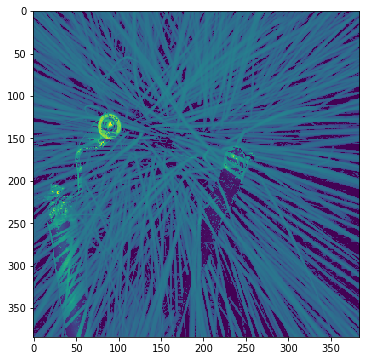

In [190]:
bkR = imread("/Users/pinghanchu/Documents/Git/Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif".format(shot,shot,pic))
#imgL = imread("/Users/pinghanchu/Documents/Git/Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum_nobeginning.tif".format(shot,shot,pic))
width, height = imgR1.shape
#imgL1 = a
#print(imgL1.max())
#for x in range(width):
#    for y in range(height):
#        if(imgL[x][y]>0):
#            imgL1[x][y] = math.log(imgL[x][y])
#imgL1 = imgL1/imgL1.max()*255
#print(imgL1.max())
#imgL1[imgL1<10000]=0
#imgL1[imgL1>10000]=0
for x in range(width):
    for y in range(height):
        if(imgR[x][y]>0):
            imgR1[x][y] = math.log(imgR[x][y])
imgR1 = imgR1/imgR1.max()*255
plt.figure(figsize=[6,6])
plt.imshow(imgR1+bkR)
plt.savefig("/Users/pinghanchu/Documents/Git/Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR{}_sum_normalized.tif".format(shot,shot,pic,shot))